In [118]:
pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 1.3 MB/s eta 0:00:02
   - -------------------------------------- 0.1/1.4 MB 1.1 MB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 1.6 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.4 MB 2.3 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 2.7 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 2.1 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.4 MB 2.4 MB/s eta 0:00:01
   ----------------------- ---------------- 0.9/1.4 MB 2.4 MB/s eta 0:00:01
   -------------------------- ------------- 0.9/1.4 MB 2.6 MB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.4 MB 2.2 MB/s eta 0:00:01
   -------------------------------- ------- 1.2/1.4 MB 2.3 MB/s eta 0:00:01
   ----------------------------------- ---- 1.3/1.4 MB 2.3 MB/s eta 0:00:01
   ----------------

In [122]:
pip install catboost


   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.7 MB 787.7 kB/s eta 0:02:10
   ---------------------------------------- 0.3/101.7 MB 3.0 MB/s eta 0:00:34
   ---------------------------------------- 0.8/101.7 MB 4.9 MB/s eta 0:00:21
    --------------------------------------- 1.6/101.7 MB 7.2 MB/s eta 0:00:14
    --------------------------------------- 2.3/101.7 MB 8.8 MB/s eta 0:00:12
   - -------------------------------------- 3.1/101.7 MB 9.9 MB/s eta 0:00:10
   - -------------------------------------- 3.6/101.7 MB 9.9 MB/s eta 0:00:10
   - -------------------------------------- 3.9/101.7 MB 9.5 MB/s eta 0:00:11
   - -------------------------------------- 4.4/101.7 MB 10.1 MB/s eta 0:00:10
   - -------------------------------------- 4.9/101.7 MB 9.8 MB/s eta 0:00:10
   -- ------------------------------------- 5.3/101.7 MB 9.7 MB/s eta 0:00:

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression, RANSACRegressor, TheilSenRegressor, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.colors import ListedColormap
import re

In [2]:
d = pd.read_csv('USA_Housing.csv')

In [3]:
d.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
d.shape

(5000, 7)

In [5]:
d.duplicated().sum()

0

In [6]:
d.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
d['Price'] = round(d['Price'],2)

In [9]:
d = d.drop(columns = 'Address', axis = 1)

In [10]:
d.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1059033.56
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1505890.91
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1058987.99
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1260616.81
4,59982.197226,5.040555,7.839388,4.23,26354.109472,630943.49


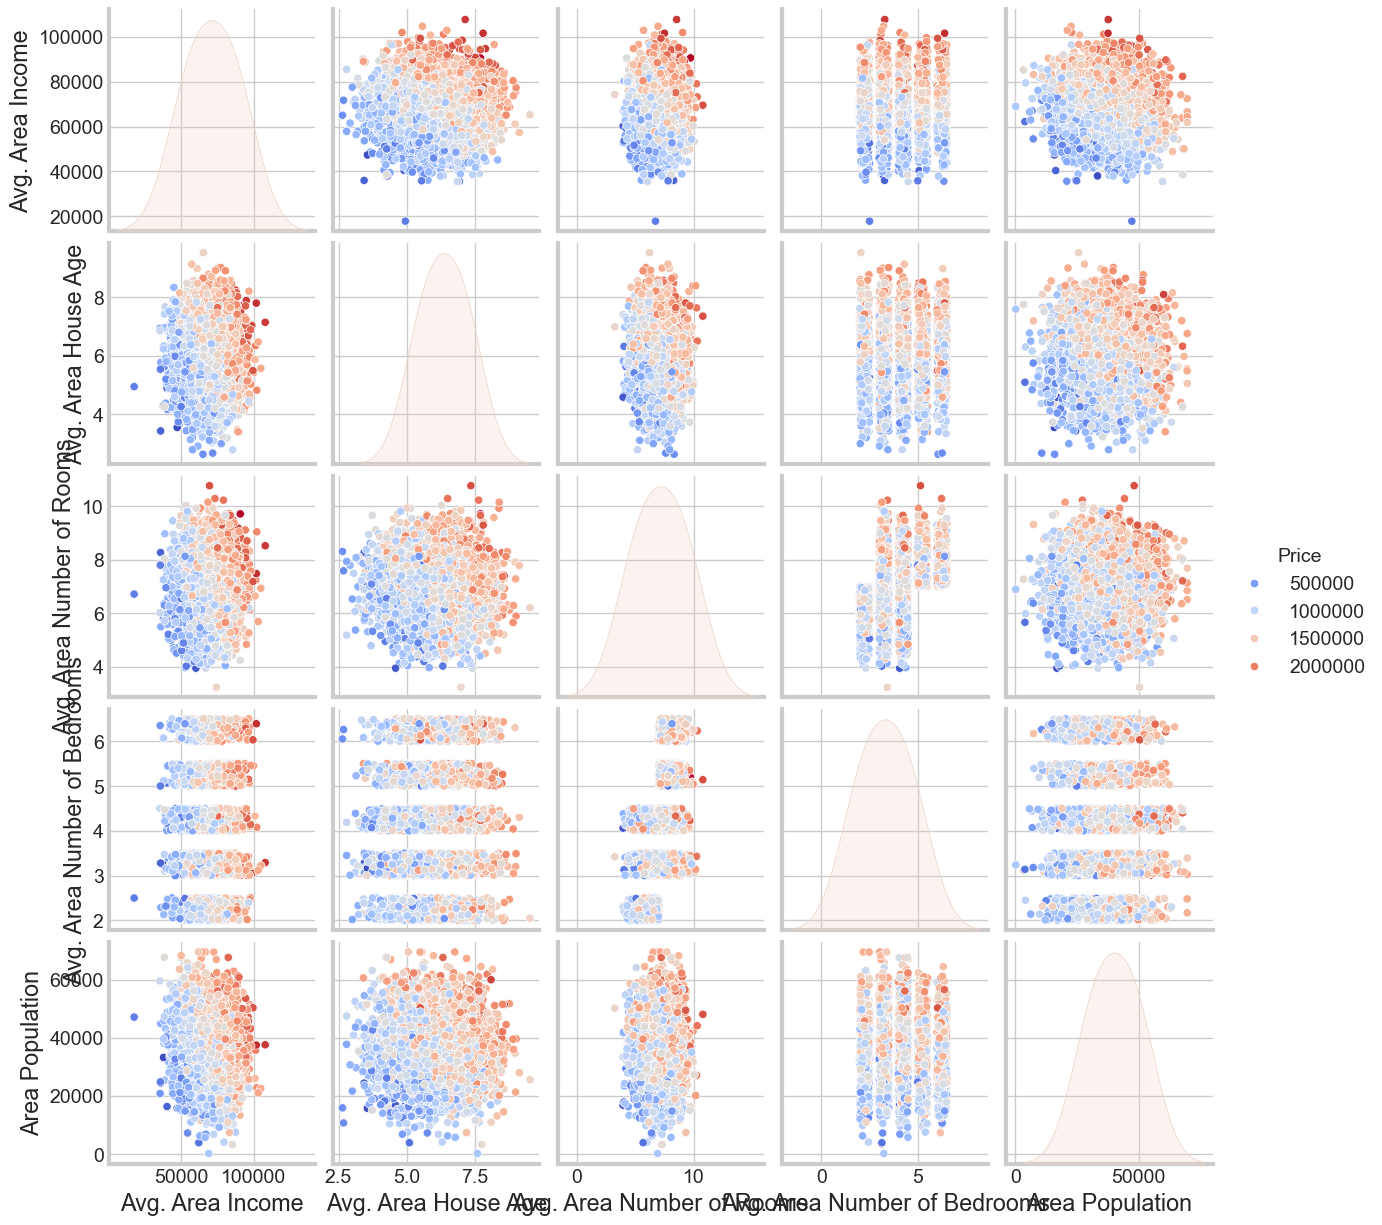

In [11]:
sns.pairplot(d, diag_kind="kde", hue="Price", palette="coolwarm")


# Outlier Analysis

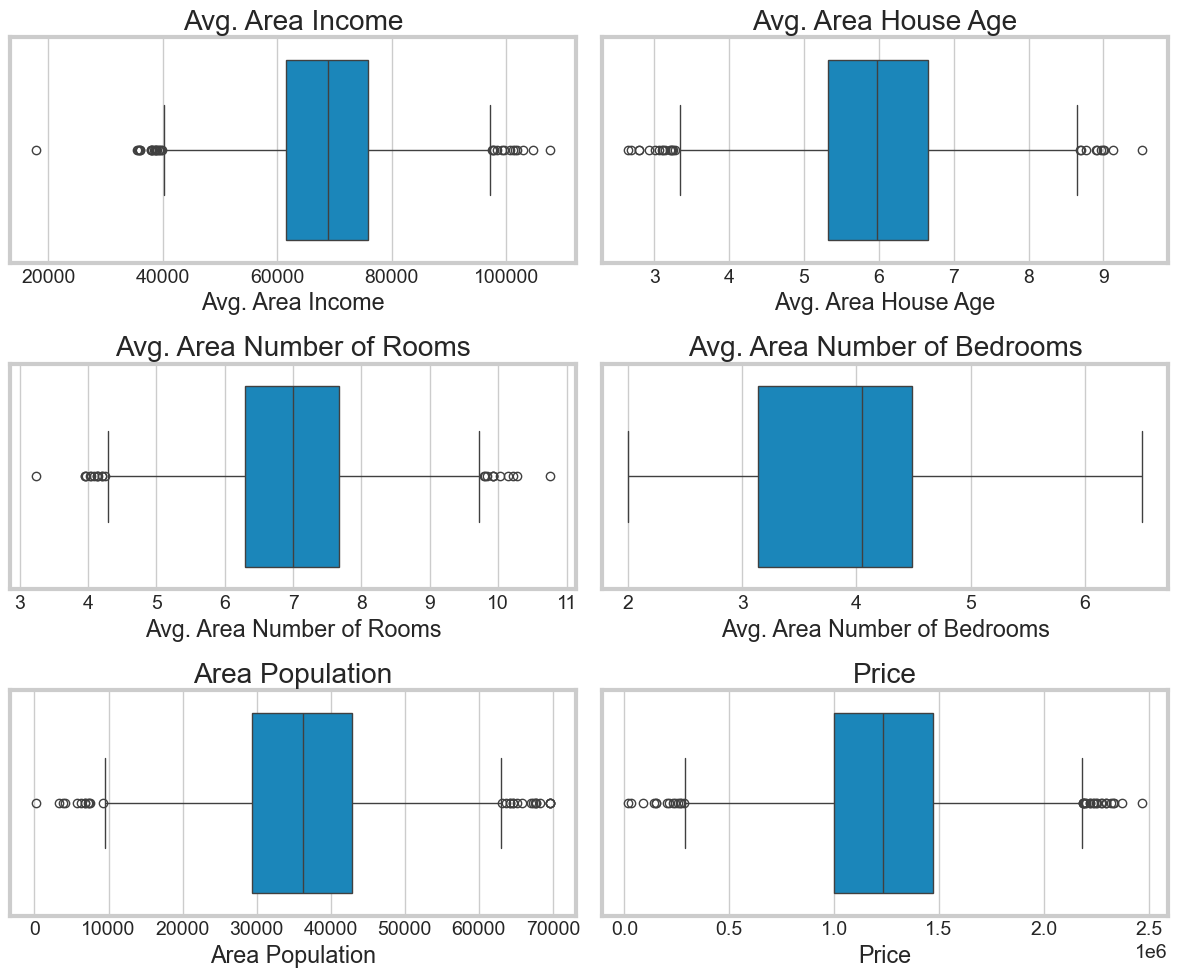

In [13]:
fig, ax = plt.subplots(3,2, figsize=(12,10))
axes_ = [axes_row for axes in ax for axes_row in axes]
for i,j in enumerate(d.columns):
    s = sns.boxplot(x = d[j], ax = axes_[i])
    s.set_title(j)
    plt.tight_layout()

In [14]:
d.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [15]:
col = d.columns

In [16]:
col

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [17]:
def co(d,col):
    Q1 = d[col].quantile(0.25)
    Q3 = d[col].quantile(0.75)
    
    IQR = Q3 - Q1
    
    LL = Q1 - 1.5*IQR
    UL = Q3 + 1.5*IQR
    
    outliers = d[(d[col] < LL) | (d[col] > UL)]
    
    print('outliers')
    print(f'totla number of outliers in data: {len(outliers)}')
    
    plt.figure(figsize=(12,10))
    plt.subplot(211)
    plt.plot(d[col])
    plt.title(col + ' with outliers')
    plt.scatter(x = outliers.index, y=outliers.values, marker = 'X', color = 'r', s = 100)
    
    plt.subplot(212)
    plt.title(col + ' after removing outliers')
    filtered = d[col] [- (d[col].isin (outliers))]
    sns.boxplot(filtered)

# Winsorization

In [32]:
from scipy.stats.mstats import winsorize
dc = d.copy()

In [34]:
def win(d,col):
    winsorize(d[col], limits = [0.005,0.005], inplace = True)

In [36]:
for i ,j in d.items():
    win(dc,i)

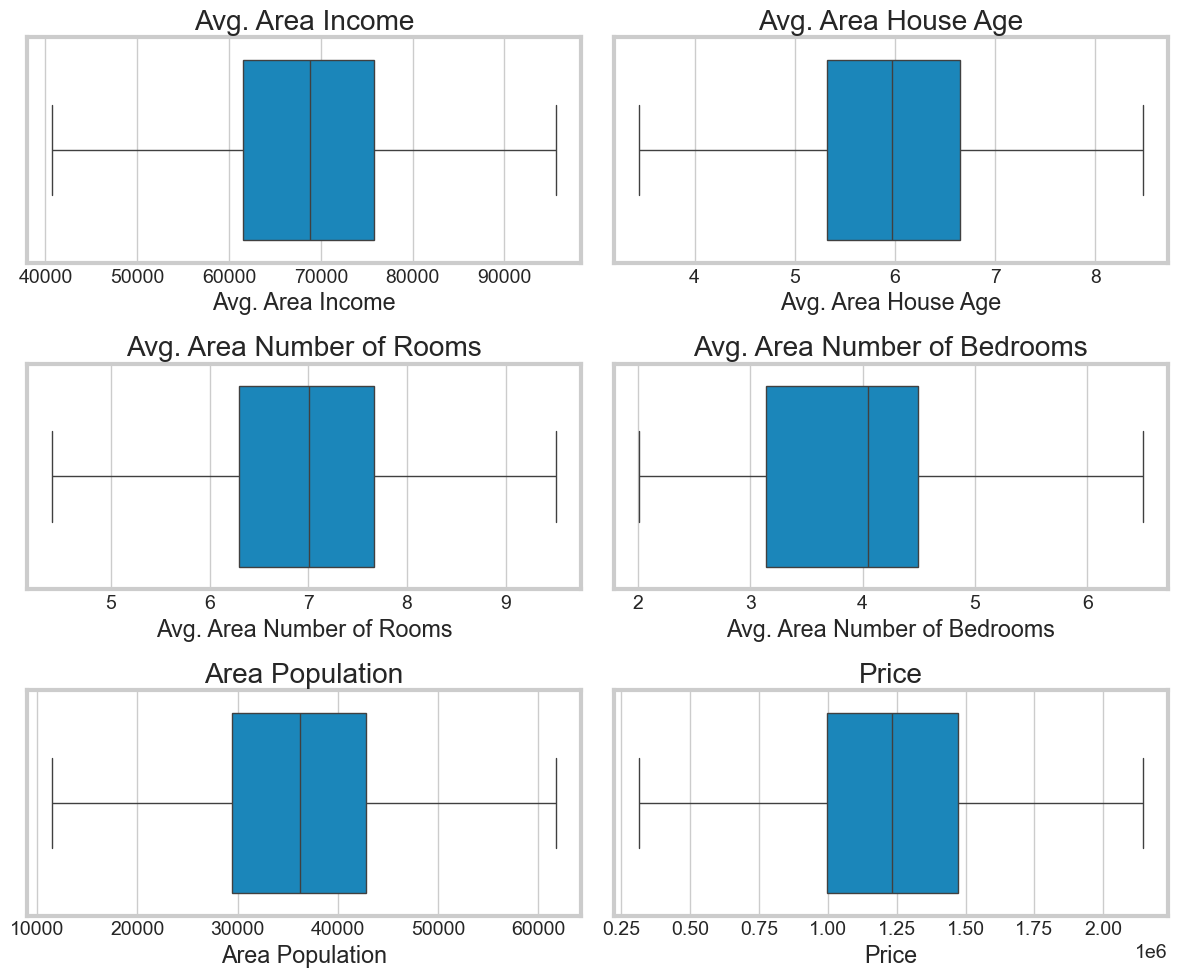

In [39]:
fig, ax = plt.subplots(3,2, figsize=(12,10))
axes_ = [axes_row for axes in ax for axes_row in axes]
for i,j in enumerate(d.columns):
    s = sns.boxplot(x = dc[j], ax = axes_[i])
    s.set_title(j)
    plt.tight_layout()

In [41]:
x = dc.drop(columns = 'Price', axis = 1)

In [43]:
y = dc['Price']

In [45]:
x.shape, y.shape

((5000, 5), (5000,))

<Axes: xlabel='Price', ylabel='Density'>

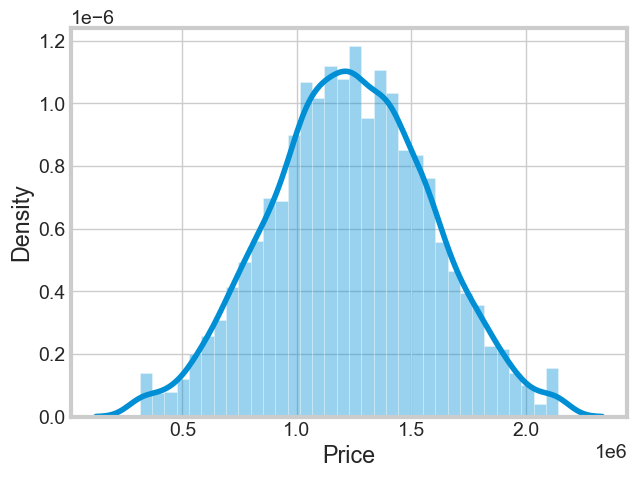

In [51]:
sns.distplot(y)

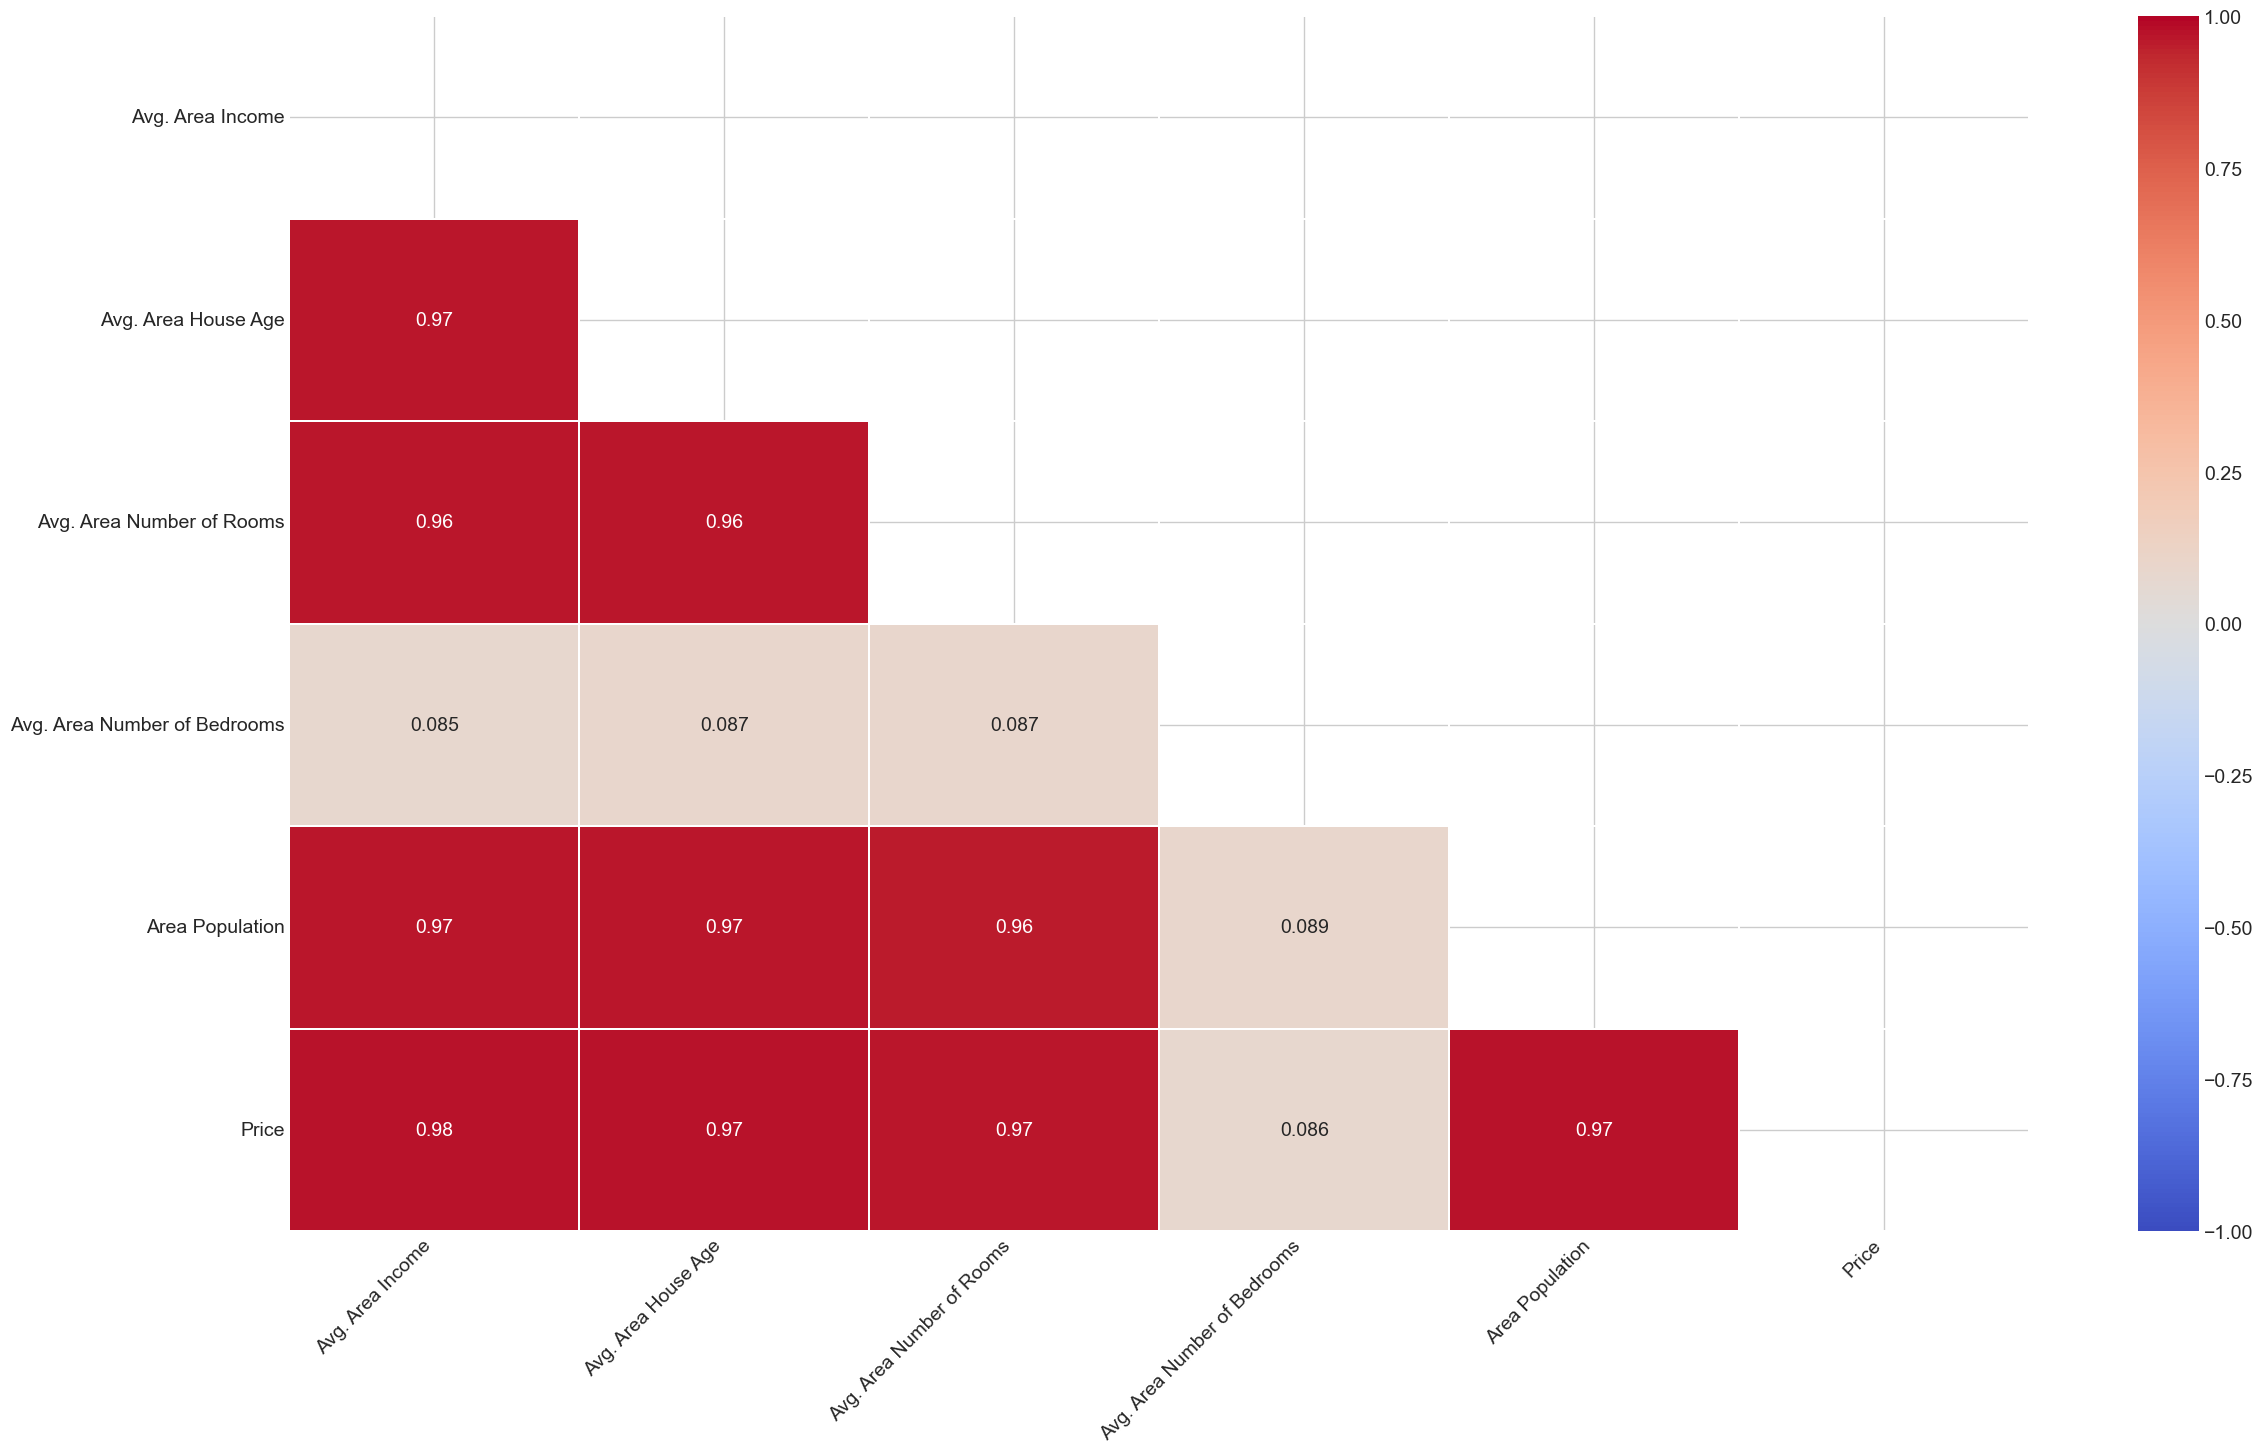

In [109]:
plt.figure(figsize = (25,15))
corr = dc.apply(lambda x: pd.factorize(x)[0]).corr()
corr = corr.fillna(0)
mask = np.triu(np.ones_like(corr, dtype = bool))
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)  
ax = sns.heatmap(corr, mask = mask, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = 'coolwarm',linewidth = 0.2, vmin = -1, vmax = 1)

In [69]:
d.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

Text(0, 0.5, 'Price')

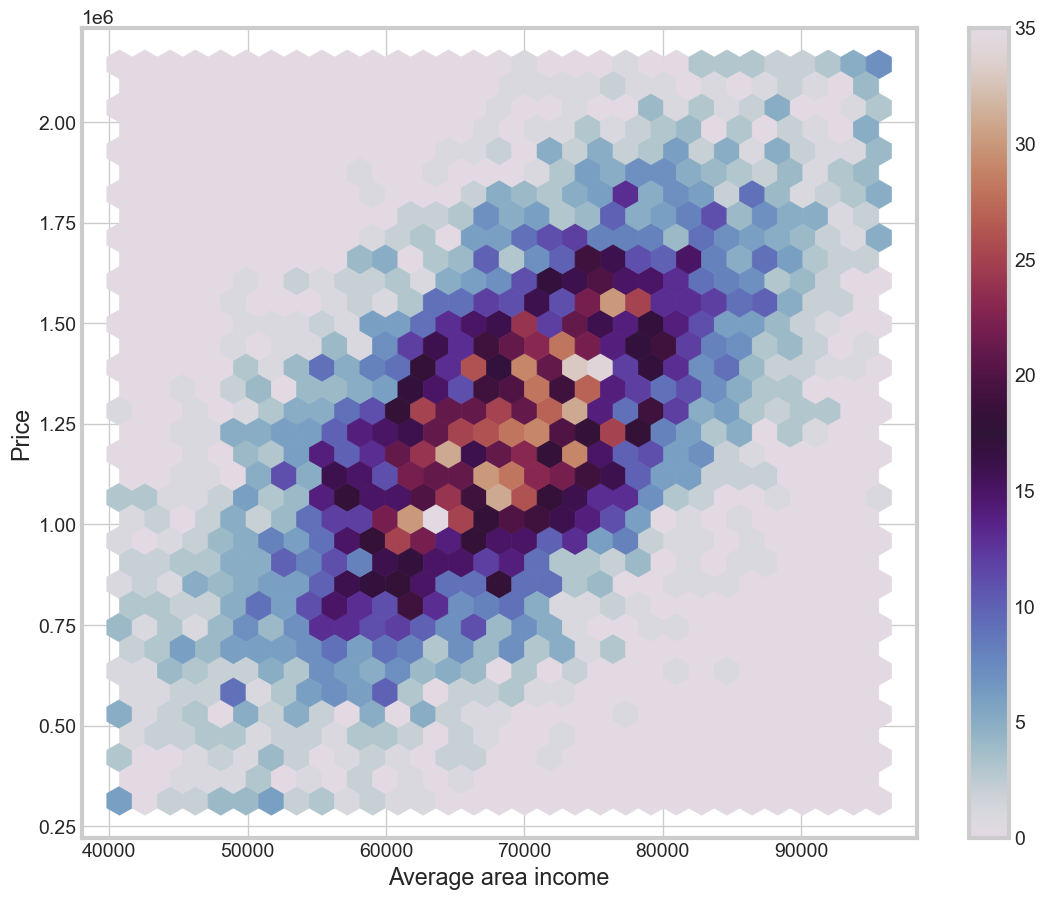

In [97]:
ax= dc.plot.hexbin(x = 'Avg. Area Income' , y = 'Price', gridsize = 30, sharex = False, figsize = (12,10), cmap = 'twilight')
ax.set_xlabel('Average area income')
ax.set_ylabel('Price')

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 31)

# Sklearn Pipeline

In [128]:
lr_pipeline = Pipeline([("scaler", StandardScaler()), ("linear_regression", LinearRegression())])
rb_pipeline = Pipeline([("scaler", StandardScaler()), ("robust_regression", RANSACRegressor(random_state=42))])
theil_pipeline = Pipeline([("scaler", StandardScaler()), ("theil_regressor", TheilSenRegressor(random_state=42))])
ridge_pipeline = Pipeline([("scaler", StandardScaler()), ("ridge_regressor", Ridge(random_state = 42))])
lasso_pipeline = Pipeline([("scaler", StandardScaler()), ("lasso_regressor", Lasso(random_state = 42))])
elastic_pipeline = Pipeline([("scaler", StandardScaler()), ("elastic_net", ElasticNet(random_state = 42))])
random_forest_pipeline = Pipeline([("scaler", StandardScaler()), ("randomforest_regression", RandomForestRegressor(random_state = 42))])
xgboost_pipeline = Pipeline([("scaler", StandardScaler()), ("xgboost_regression", XGBRegressor())])
adaboost_pipeline = Pipeline([("scaler", StandardScaler()), ("adaboost_regression", AdaBoostRegressor(random_state = 42))])
gradient_pipeline = Pipeline([("scaler", StandardScaler()), ("gradientboost_regression", GradientBoostingRegressor(random_state = 42))])
lightgbm_pipeline = Pipeline([("scaler", StandardScaler()), ("lightgbm_regression", LGBMRegressor(random_state = 42))])
catboost_pipeline = Pipeline([("scaler", StandardScaler()), ("catboost_regression", CatBoostRegressor(random_state = 42, silent = True))])
decisiontree_pipeline = Pipeline([("scaler", StandardScaler()), ("decisiontree_regression", DecisionTreeRegressor(random_state = 42))])
knn_pipeline = Pipeline([("scaler", StandardScaler()), ("knn_regression", KNeighborsRegressor())])
sgc_pipeline = Pipeline([("scaler", StandardScaler()), ("sgd_regression", SGDRegressor(random_state = 42))])

In [132]:
pipelines = [
    lr_pipeline, rb_pipeline, theil_pipeline, ridge_pipeline, lasso_pipeline, elastic_pipeline,
    random_forest_pipeline, xgboost_pipeline, adaboost_pipeline, gradient_pipeline, lightgbm_pipeline,
    catboost_pipeline, decisiontree_pipeline, knn_pipeline, sgc_pipeline
]


In [163]:
for i, pipe in enumerate(pipelines):
    score = cross_val_score(pipe, x, y, cv=10)
    print(pipe_dict[i], ":", score.mean())

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())]) : 0.9149440641880741
Pipeline(steps=[('scaler', StandardScaler()),
                ('robust_regression', RANSACRegressor(random_state=42))]) : 0.9052638307039592
Pipeline(steps=[('scaler', StandardScaler()),
                ('theil_regressor', TheilSenRegressor(random_state=42))]) : 0.914828789830306
Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge_regressor', Ridge(random_state=42))]) : 0.9149441324435852
Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso_regressor', Lasso(random_state=42))]) : 0.9149440550810283
Pipeline(steps=[('scaler', StandardScaler()),
                ('elastic_net', ElasticNet(random_state=42))]) : 0.8096503109985094
Pipeline(steps=[('scaler', StandardScaler()),
                ('randomforest_regression',
                 RandomForestRegressor(random_state=42))]) : 0.8856027107846453
Pipeline(steps=[('scaler', Standar

# Cross Validation 

In [169]:
pipeline_fm = Pipeline([('scaler', StandardScaler()),('classifier', LinearRegression())])

In [175]:
random_params =[
    
    {"classifier": [LinearRegression()],
    "classifier__normalize": [True, False]
     },
    {"classifier": [Ridge()],
     "classifier__alpha": np.arange(0.5, 5, 0.25),
     "classifier__fit_intercept": [True, False],
     "classifier__max_iter": [50, 100, 500, 1000, 2500],
     "classifier__tol": [0.001, 0.01, 0.05, 0.1, 1, 5, 10],
     "classifier__solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg,", "sag", "saga"]
    },
    {"classifier": [Lasso()],
    "classifier__alpha": np.arange(0.5, 5, 0.25),
    "classifier__fit_intercept": [True, False],
    "classifier__max_iter": [50, 100, 500, 1000, 2500],
    "classifier__tol": [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10],
    "classifier__warm_start": [True, False],
    "classifier__positive": [True, False],
    "classifier__selection": ["cyclic", "random"]
     }
]

In [183]:
random_search = RandomizedSearchCV(estimator = pipeline_fm, param_distributions = random_params, scoring = 'neg_mean_absolute_error',n_jobs = -1, cv = 8, verbose = 10, random_state = 31)

In [185]:
best_model = random_search.fit(x_train,y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


In [187]:
best_model.best_params_

{'classifier__warm_start': False,
 'classifier__tol': 0.01,
 'classifier__selection': 'cyclic',
 'classifier__positive': True,
 'classifier__max_iter': 500,
 'classifier__fit_intercept': True,
 'classifier__alpha': 4.75,
 'classifier': Lasso()}

In [191]:
lasso_pipeline = Pipeline([('scaler', StandardScaler()), ('Lasso_regression', Lasso(alpha = 1.5,tol = 0.1, warm_start = True))])

In [193]:
lasso = lasso_pipeline.fit(x_train,y_train)

In [195]:
y_pred = lasso.predict(x_test)

# Prediction diagnosis

In [244]:
def print_metrics(actual,predicted):
    mae= mean_absolute_error(actual,predicted)
    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    r2 = r2_score(actual,predicted)
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2 : {r2}")

In [216]:
def plots(actual,predicted):

    error = (actual-predicted)

    plt.figure(figsize =(10,8))
    plt.subplot(221)
    plt.title('distplot')
    sns.distplot(error)
    
    plt.subplot(222)
    plt.title('Residual plot')
    sns.scatterplot(x = predicted, y=error)
    sns.lineplot(x = [min(predicted), max(predicted)], y = [0,0], linestyle = '--', color = 'r')
    
    ax = plt.subplot(223)
    plt.title('Quantile plot')
    sm.qqplot(error, line = 'r', ax= ax)
    
    ax2 = plt.subplot(224)
    plt.title('Autocorrelation plot')
    plot_acf(error, ax = ax2)
    plt.tight_layout()

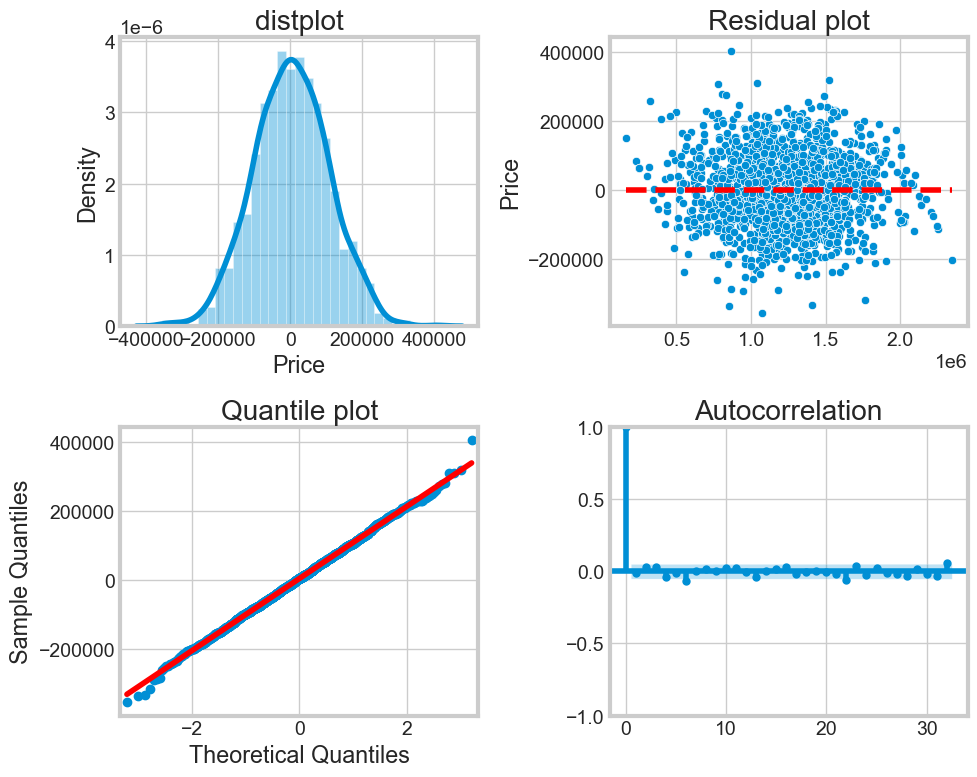

In [218]:
plots(y_test,y_pred)

<Axes: xlabel='Price'>

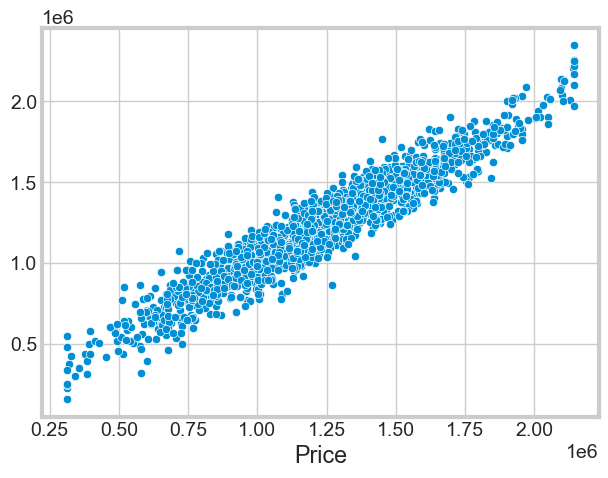

In [228]:
sns.scatterplot(x = y_test,y = y_pred,)

In [246]:
print_metrics(y_test,y_pred)

MAE: 83029.90907576923
MSE: 10845760879.404959
RMSE: 104142.98286204865
R2 : 0.9130327302932324
